### Importación de datos



In [7]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
# Función para calcular el ingreso total y el conteo de ventas
def facturacion_tiendas(df, nombre_tienda):
    suma_tiendas = df['Precio'].sum()
    cantidad = len(df)
    return pd.DataFrame({
        'Tienda': [nombre_tienda],
        'Ingreso Total': [suma_tiendas]
    })

In [56]:
# Calcular para cada tienda
df1 = facturacion_tiendas(tienda1, "Tienda 1")
df2 = facturacion_tiendas(tienda2, "Tienda 2")
df3 = facturacion_tiendas(tienda3, "Tienda 3")
df4 = facturacion_tiendas(tienda4, "Tienda 4")

In [57]:
# Unir todos los resultados
resumen = pd.concat([df1, df2, df3, df4])
pd.set_option('display.float_format', '{:,.0f}'.format)
print(resumen)

     Tienda  Ingreso Total
0  Tienda 1  1,150,880,400
0  Tienda 2  1,116,343,500
0  Tienda 3  1,098,019,600
0  Tienda 4  1,038,375,700


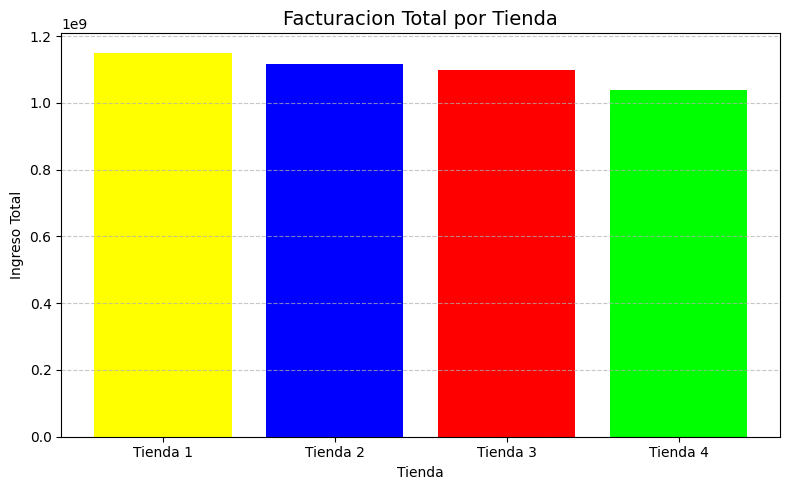

In [59]:
# Crear el gráfico de barras
colores = ["#FFFF00", "#0000FF", "#FF0000", "#00FF00"]
plt.figure(figsize=(8, 5))
plt.bar(resumen["Tienda"], resumen["Ingreso Total"], color=colores)
plt.title("Facturacion Total por Tienda", fontsize=14)
plt.xlabel("Tienda")
plt.ylabel("Ingreso Total")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [76]:
#función para contar productos por categoria y conviertiendolo a Df
def venta_categoria(df, nombre_tienda):
    venta = df.groupby('Categoría del Producto').size().reset_index(name ='Cantidad')
    venta['Tienda'] = nombre_tienda
    return venta

In [77]:
#aplicar a la funcion por cada tienda
t1 = venta_categoria(tienda, 'Tienda 1')
t2 = venta_categoria(tienda2, 'Tienda 2')
t3 = venta_categoria(tienda3, 'Tienda 3')
t4 = venta_categoria(tienda4, 'Tienda 4')

In [69]:
#uniendo todo para gráficar
total = pd.concat([t1, t2, t3, t4], ignore_index=True)

In [116]:
# Pivotear el DataFrame para reorganizar los datos
ventas_por_categoria = total.pivot_table(index='Categoría del Producto',
                                         columns='Tienda',
                                         values='Cantidad',
                                         fill_value=0)

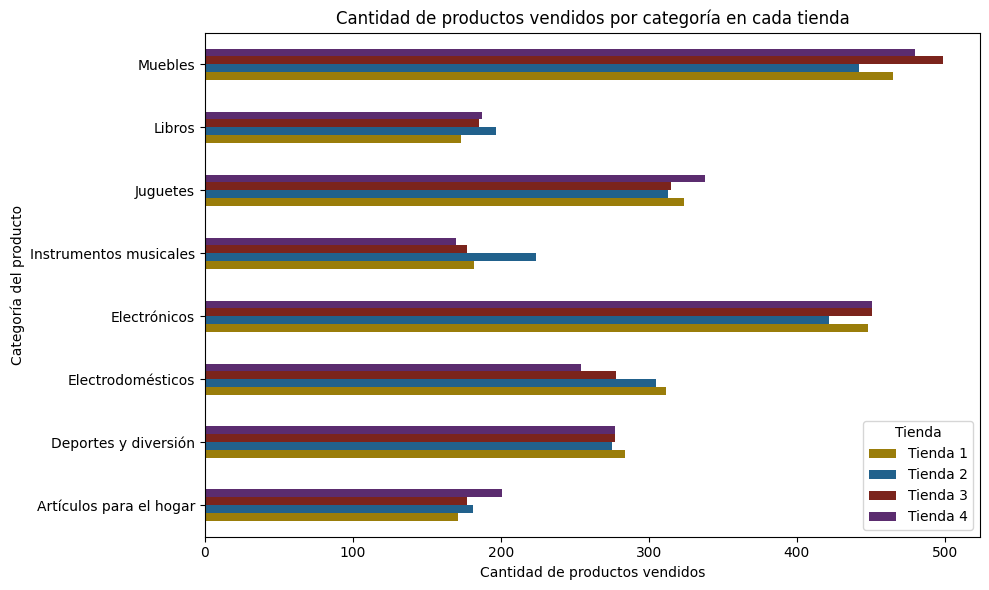

In [117]:
colores = ["#9a7d0a", "#21618c", "#7b241c", "#5b2c6f"]  # Un color por tienda
ventas_por_categoria.plot(kind='barh', figsize=(10, 6), color=colores)

plt.title("Cantidad de productos vendidos por categoría en cada tienda")
plt.xlabel("Cantidad de productos vendidos")
plt.ylabel("Categoría del producto")
plt.legend(title="Tienda")
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [91]:
#función para calcular promedio
def promedio_tienda(df, nombre_tienda):
    cantidad = len(df)
    suma_promedio = df['Calificación'].sum()/cantidad
    return pd.DataFrame({'Tienda': [nombre_tienda], 'Conteo' : [cantidad], 'Promedio' : [suma_promedio]})

In [96]:
#Asignar función a cada tienda
p1 = promedio_tienda(tienda1, 'Tienda 1')
p2 = promedio_tienda(tienda2, 'Tienda 2')
p3 = promedio_tienda(tienda3, 'Tienda 3')
p4 = promedio_tienda(tienda4, 'Tienda 4')

In [97]:
#Concatenación
total_promedio = pd.concat([p1, p2, p3, p4], ignore_index=True)

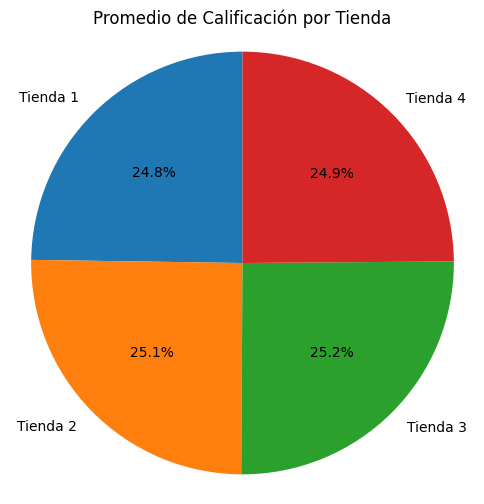

In [114]:
plt.figure(figsize=(6,6))
plt.pie(total_promedio['Promedio'], labels=total_promedio['Tienda'], autopct='%1.1f%%', startangle=90)
plt.title('Promedio de Calificación por Tienda')
plt.axis('equal')  # Para que sea un círculo perfecto
plt.show()


# 4. Productos más y menos vendidos

In [118]:
#función para contabilizar productos
def productos_tienda(df, nombre_tienda):
    conteo_productos = df['Producto'].value_counts()
    mas_vendido = conteo_productos.idxmax()
    menos_vendido = conteo_productos.idxmin()
    return pd.DataFrame({'Tienda' : [nombre_tienda], 'Producto más vendido' : [mas_vendido], 'Producto menos vendido' : [menos_vendido]})

In [120]:
#Aplicar a la funcion por cada tienda
m1 = productos_tienda(tienda1, 'Tienda 1')
m2 = productos_tienda(tienda2, 'Tienda 2')
m3 = productos_tienda(tienda3, 'Tienda 3')
m4 = productos_tienda(tienda4, 'Tienda 4')

In [121]:
#Concatenación
productos_mas_menos_vendidos = pd.concat([m1, m2, m3, m4], ignore_index=True)

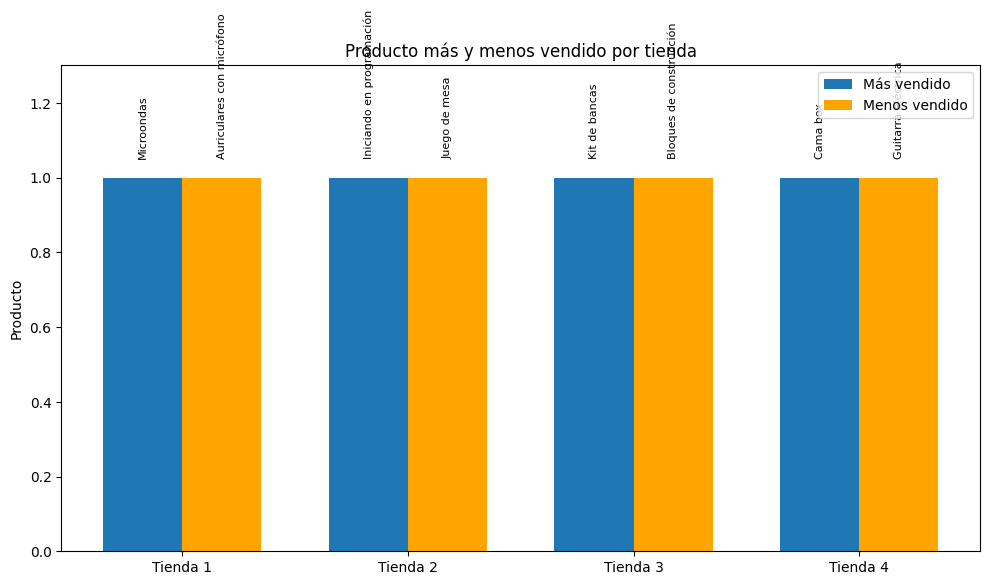

In [123]:
import numpy as np

# con columnas: 'Tienda', 'Producto más vendido', 'Producto menos vendido'

tiendas = productos_mas_menos_vendidos['Tienda']
mas_vendidos = productos_mas_menos_vendidos['Producto más vendido']
menos_vendidos = productos_mas_menos_vendidos['Producto menos vendido']

x = np.arange(len(tiendas))  # Posiciones para las barras
ancho = 0.35  # Ancho de las barras

fig, ax = plt.subplots(figsize=(10, 6))
barras1 = ax.bar(x - ancho/2, [1]*len(x), width=ancho, label='Más vendido')
barras2 = ax.bar(x + ancho/2, [1]*len(x), width=ancho, label='Menos vendido', color='orange')

# Etiquetas de productos como texto encima de las barras
for i, (mv, lv) in enumerate(zip(mas_vendidos, menos_vendidos)):
    ax.text(x[i] - ancho/2, 1.05, mv, ha='center', va='bottom', fontsize=8, rotation=90)
    ax.text(x[i] + ancho/2, 1.05, lv, ha='center', va='bottom', fontsize=8, rotation=90)

ax.set_title('Producto más y menos vendido por tienda')
ax.set_xticks(x)
ax.set_xticklabels(tiendas)
ax.set_ylabel('Producto')
ax.legend()
ax.set_ylim(0, 1.3)  # Para dejar espacio al texto

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [124]:
#función para calcular promedio del envío de cada tienda
def promedio_tienda_envio(df, nombre_tienda):
    contador_envio = len(df)
    suma_promedio_envio = df['Costo de envío'].sum()/contador_envio
    return pd.DataFrame({'Tienda': [nombre_tienda], 'Conteo' : [contador_envio], 'Promedio' : [suma_promedio_envio]})

In [126]:
#Aplicación de la función a todas las tiendas

e1 = promedio_tienda_envio(tienda1, 'Tienda 1')
e2 = promedio_tienda_envio(tienda2, 'Tienda 2')
e3 = promedio_tienda_envio(tienda3, 'Tienda 3')
e4 = promedio_tienda_envio(tienda4, 'Tienda 4')

In [127]:
#concatenación
promedio_envios = pd.concat([e1, e2, e3, e4], ignore_index=True)

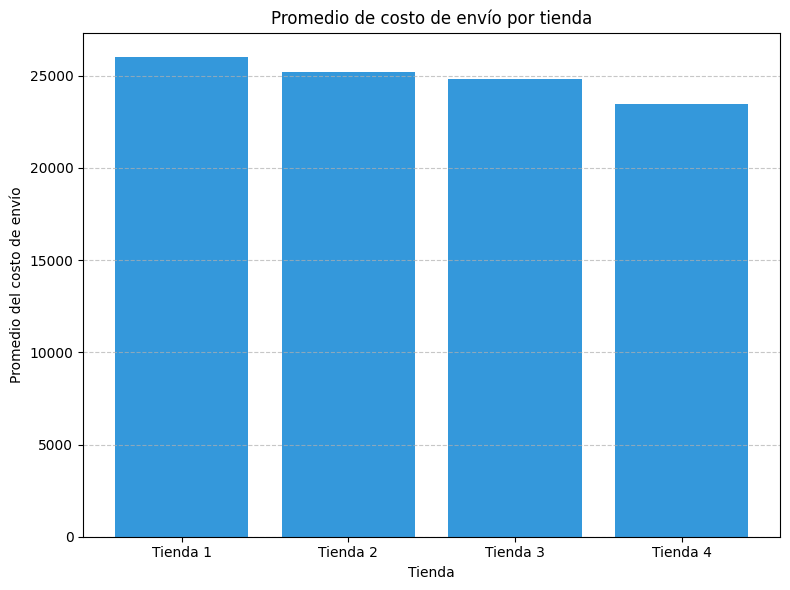

In [128]:
plt.figure(figsize=(8, 6))
plt.bar(promedio_envios['Tienda'], promedio_envios['Promedio'], color='#3498db')
plt.title('Promedio de costo de envío por tienda')
plt.xlabel('Tienda')
plt.ylabel('Promedio del costo de envío')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()